In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP

In [7]:
data_filepath = "full_numpy_bitmap_alarm clock.npy"

data = np.load(data_filepath)

In [8]:
data.shape

(123399, 784)

In [9]:
data_images = data.reshape(-1, 28, 28)

In [10]:
data_images.shape

(123399, 28, 28)

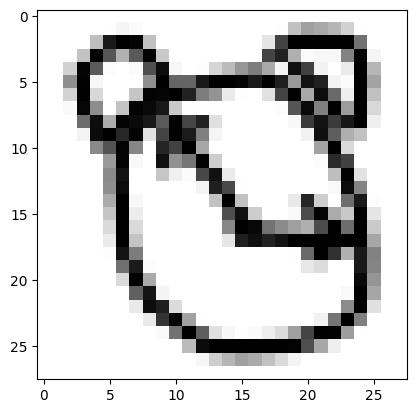

In [15]:
plt.imshow(data_images[0], cmap='Greys');

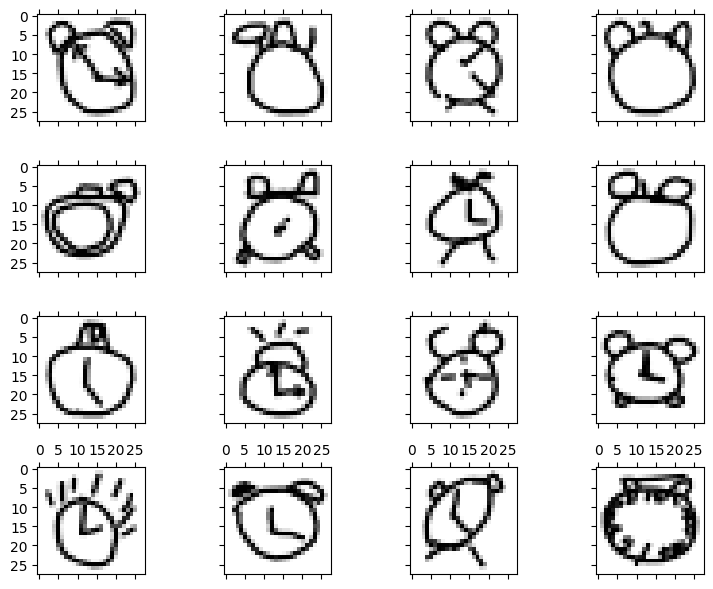

In [22]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 6))
for i, ax in enumerate(axs.flatten()):
    ax.matshow(data_images[i], cmap='Greys')
plt.tight_layout()
plt.show()

In [23]:
%%time 

x_tfm = UMAP(n_components=2, verbose=1).fit_transform(data)

UMAP( verbose=1)
Wed Jul 26 13:49:54 2023 Construct fuzzy simplicial set
Wed Jul 26 13:49:54 2023 Finding Nearest Neighbors
Wed Jul 26 13:49:54 2023 Building RP forest with 23 trees
Wed Jul 26 13:50:02 2023 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	Stopping threshold met -- exiting after 6 iterations
Wed Jul 26 13:50:15 2023 Finished Nearest Neighbor Search
Wed Jul 26 13:50:18 2023 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Wed Jul 26 13:50:59 2023 Finished embedding
CPU times: user 5min 53s, sys: 29.8 s, total: 6min 23s
Wall time: 1min 5s


In [24]:
x_tfm.shape

(123399, 2)

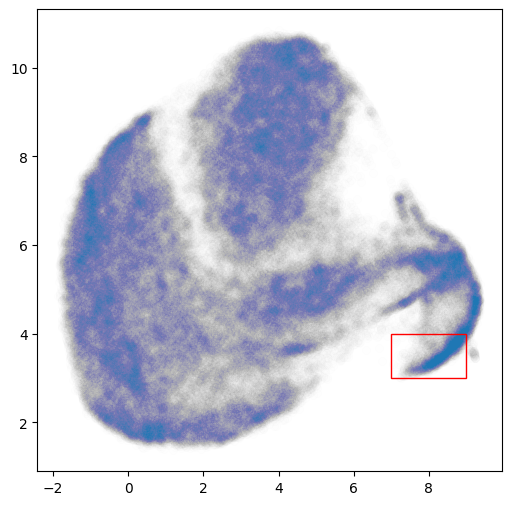

In [41]:
import matplotlib.pylab as plt 
import matplotlib.patches

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x_tfm[:, 0], x_tfm[:, 1], alpha=0.002)

left_bottom = (7, 3)
width, height = (2, 1)

ax.add_patch(matplotlib.patches.Rectangle(left_bottom, width, height, color='r', fill=False))
plt.show()

In [43]:
xs = (left_bottom[0], left_bottom[0] + width)
ys = (left_bottom[1], left_bottom[1] + height)

In [44]:
predicate = (x_tfm[:,0] >= xs[0]) & (x_tfm[:,0] <= xs[1]) & (x_tfm[:,1] >= ys[0]) & (x_tfm[:,1] <= ys[1]) 

In [45]:
sum(predicate)

2634

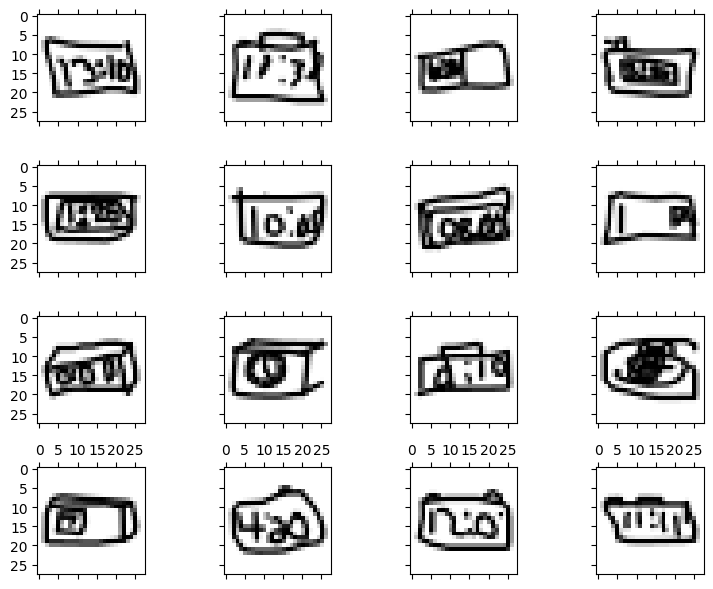

In [46]:
fig, axs = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8, 6))
for i, ax in enumerate(axs.flatten()):
    ax.matshow(data_images[predicate][i], cmap='Greys')
plt.tight_layout()
plt.show()

In [50]:
df = (
    pd.DataFrame(x_tfm, columns=['x', 'y'])
    .assign(
        path=lambda d: d.index.map(lambda i: f'http://127.0.0.1:8000/generate/{i}')
    )
)

In [51]:
df.head()

,x,y,path
0,1.190128,4.762406,http://127.0.0.1:8000/generate/0
1,0.939476,5.229913,http://127.0.0.1:8000/generate/1
2,3.201885,7.332798,http://127.0.0.1:8000/generate/2
3,0.606193,2.703486,http://127.0.0.1:8000/generate/3
4,4.700633,3.877172,http://127.0.0.1:8000/generate/4


In [55]:
df.sample(frac=0.1).to_csv("alarm_clock_small.csv", index=False)